# Gaussian Processes
## Part 2: Periodic kernel
In this tutorial, we show periodic GPs for detrending time-series data. Wotan offers the parameter ``kernel=periodic_auto`` which detects the strongest periodic signal using a Lomb-Scargle periodogram search, and then fits a GP with a periodic (ExpSineSquared) kernel, in combination with a Matern kernel to consume the remaining (non-periodic) variation.

Here, we use synthetic data:

In [8]:
import numpy as np
points = 1000
time = np.linspace(0, 30, points)
flux = 1 + np.sin(time)  / points
noise = np.random.normal(0, 0.0001, points)
flux += noise

for i in range(points):  
    if i % 75 == 0:
        flux[i:i+5] -= 0.0004  # Add some transits
        flux[i+50:i+52] += 0.0002  # and flares

Use wotan to detrend:

In [9]:
from wotan import flatten
flatten_lc, trend_lc = flatten(
    time,
    flux,
    method='gp',
    kernel='periodic_auto',
    kernel_size=5,
    return_trend=True)

Segment 1 of 1


Plot the result:

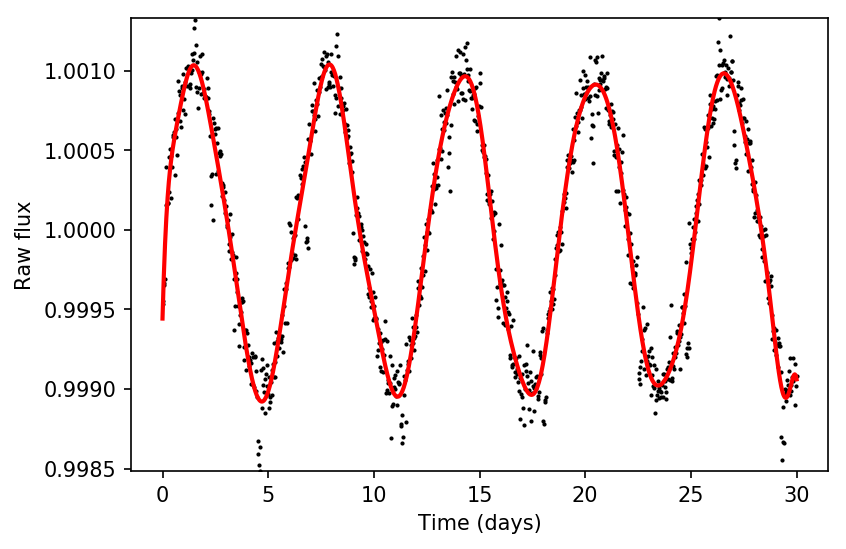

In [10]:
from matplotlib import rcParams; rcParams["figure.dpi"] = 150
plt.figure()
plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc, color='red', linewidth=2)
plt.ylim(min(flux), max(flux))
plt.xlabel('Time (days)')
plt.ylabel('Raw flux');

It also often works well for data that is periodic with additional trends and gaps:

Segment 1 of 2
Segment 2 of 2


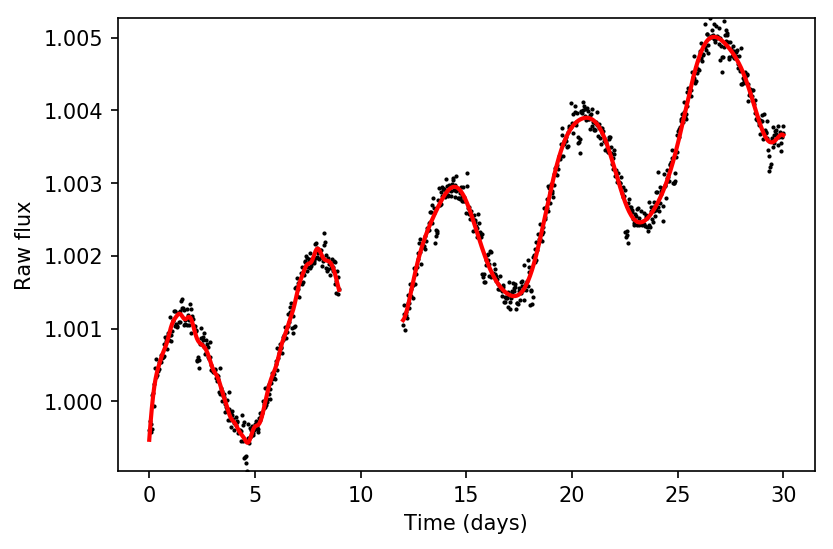

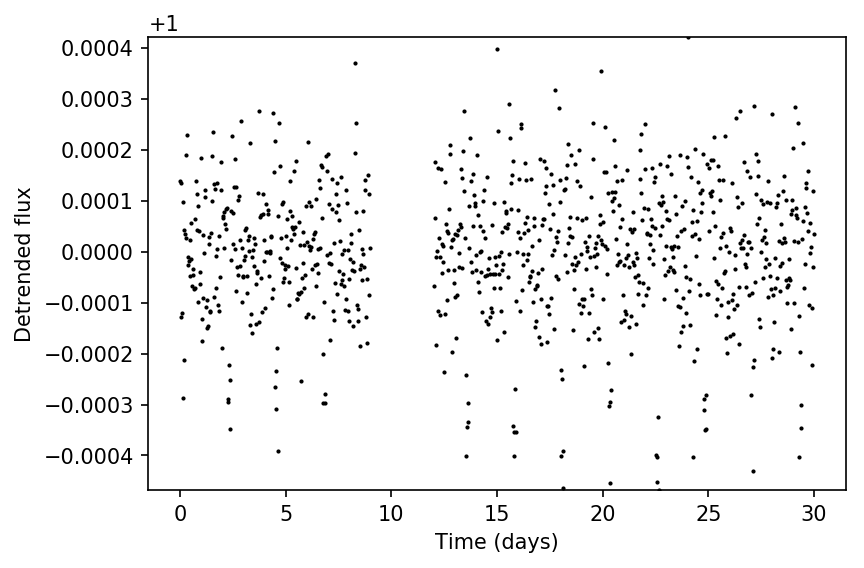

In [11]:
points = 1000
time = np.linspace(0, 30, points)
flux = 1 + ((np.sin(time) + time / 10 + time**1.5 / 100) / 1000)
noise = np.random.normal(0, 0.0001, points)
flux += noise

for i in range(points):  
    if i % 75 == 0:
        flux[i:i+5] -= 0.0004  # Add some transits
        flux[i+50:i+52] += 0.0002  # and flares
flux[300:400] = np.nan

flatten_lc, trend_lc = flatten(
    time,
    flux,
    method='gp',
    kernel='periodic_auto',
    kernel_size=5,
    return_trend=True)

plt.figure()
plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc, color='red', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Raw flux')
plt.ylim(min(flux), max(flux));

plt.figure()
plt.scatter(time, flatten_lc, s=1, color='black')
plt.ylim(min(flatten_lc), max(flatten_lc))
plt.xlabel('Time (days)')
plt.ylabel('Detrended flux')
plt.show();